# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [722]:
m = 1
A = 0.10#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [723]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [724]:
global compactified=true
global loggrid=true

global bisection=false

false

In [725]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [726]:
print(N)

200.0

In [727]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [728]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [729]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

"""if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;""";

step size is  0.005
the time step is 0.0005


# Initial data of m β Ψ and Ψ,x

In [730]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [731]:
"""derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
eval1 = derpsi_func(inverse(initX1))

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
eval2 = derpsi_func(initX1)


plot([(initX1) initX1 initX1] , [eval1 eval2 state_array[4:L-3,4]])""";

In [732]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [733]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [734]:
y0=Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

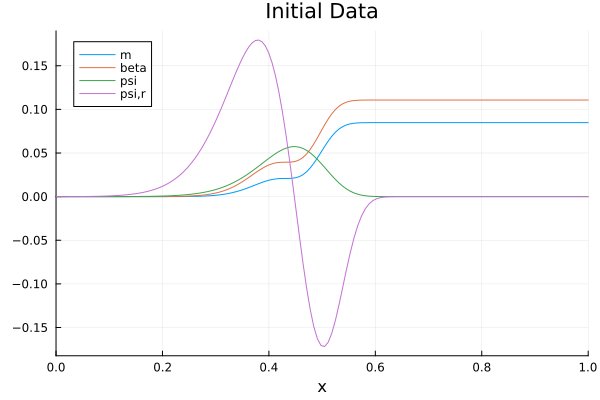

In [735]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [736]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [737]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [738]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

3.3080292588727085


In [739]:
using Base.Threads
Threads.nthreads()

4

In [740]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [ ]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 300 dt is 2.0e-5, t=0.006000000000000014 speed is 0.30229501790325475, dx/dt=249.99999999999997


iteration 600 dt is 2.0e-5, t=0.011999999999999848 speed is 0.3022952696752716, dx/dt=249.99999999999997


iteration 900 dt is 2.0e-5, t=0.017999999999999603 speed is 0.302295543040211, dx/dt=249.99999999999997


iteration 1200 dt is 2.0e-5, t=0.02399999999999936 speed is 0.3022958396266088, dx/dt=249.99999999999997


iteration 1500 dt is 2.0e-5, t=0.029999999999999114 speed is 0.30229616117270447, dx/dt=249.99999999999997


iteration 1800 dt is 2.0e-5, t=0.03599999999999887 speed is 0.30229650953351794, dx/dt=249.99999999999997


iteration 2100 dt is 2.0e-5, t=0.04199999999999863 speed is 0.302296886688423, dx/dt=249.99999999999997


iteration 2400 dt is 2.0e-5, t=0.047999999999998384 speed is 0.3022972947492565, dx/dt=249.99999999999997


iteration 2700 dt is 2.0e-5, t=0.05399999999999814 speed is 0.3022977359690051, dx/dt=249.99999999999997


iteration 3000 dt is 2.0e-5, t=0



iteration 23400 dt is 2.0e-5, t=0.4680000000001865 speed is 0.30309449485677364, dx/dt=249.99999999999997


iteration 23700 dt is 2.0e-5, t=0.4740000000001925 speed is 0.3031474713949052, dx/dt=249.99999999999997


iteration 24000 dt is 2.0e-5, t=0.4800000000001985 speed is 0.3032037059280793, dx/dt=249.99999999999997


iteration 24300 dt is 2.0e-5, t=0.4860000000002045 speed is 0.3032633825222218, dx/dt=249.99999999999997


iteration 24600 dt is 2.0e-5, t=0.4920000000002105 speed is 0.30332669422893677, dx/dt=249.99999999999997


iteration 24900 dt is 2.0e-5, t=0.4980000000002165 speed is 0.3033938434276215, dx/dt=249.99999999999997


iteration 25200 dt is 2.0e-5, t=0.5040000000002225 speed is 0.3034650421762643, dx/dt=249.99999999999997


iteration 25500 dt is 2.0e-5, t=0.5100000000002285 speed is 0.3035405125711509, dx/dt=249.99999999999997


iteration 25800 dt is 2.0e-5, t=0.5160000000002345 speed is 0.303620487115741, dx/dt=249.99999999999997


iteration 26100 dt is 2.0e-5, t=0.



iteration 46500 dt is 2.0e-5, t=0.9300000000006485 speed is 0.3534199457048485, dx/dt=249.99999999999997


iteration 46800 dt is 2.0e-5, t=0.9360000000006545 speed is 0.35583107473649367, dx/dt=249.99999999999997


iteration 47100 dt is 2.0e-5, t=0.9420000000006605 speed is 0.35835347317129523, dx/dt=249.99999999999997


iteration 47400 dt is 2.0e-5, t=0.9480000000006665 speed is 0.36099374987379035, dx/dt=249.99999999999997


iteration 47700 dt is 2.0e-5, t=0.9540000000006725 speed is 0.363758140495547, dx/dt=249.99999999999997


iteration 48000 dt is 2.0e-5, t=0.9600000000006785 speed is 0.3666519839162248, dx/dt=249.99999999999997


iteration 48300 dt is 2.0e-5, t=0.9660000000006845 speed is 0.36968206479229926, dx/dt=249.99999999999997


iteration 48600 dt is 2.0e-5, t=0.9720000000006905 speed is 0.37285560982090205, dx/dt=249.99999999999997


iteration 48900 dt is 2.0e-5, t=0.9780000000006965 speed is 0.3761803223669539, dx/dt=249.99999999999997


iteration 49200 dt is 2.0e-5, t



iteration 69600 dt is 2.0e-5, t=1.3919999999989345 speed is 0.5711940218765226, dx/dt=249.99999999999997


iteration 69900 dt is 2.0e-5, t=1.3979999999989072 speed is 0.5546796076889676, dx/dt=249.99999999999997


iteration 70200 dt is 2.0e-5, t=1.40399999999888 speed is 0.5390680550345517, dx/dt=249.99999999999997


iteration 70500 dt is 2.0e-5, t=1.4099999999988526 speed is 0.5243245520774218, dx/dt=249.99999999999997


iteration 70800 dt is 2.0e-5, t=1.4159999999988253 speed is 0.5104108235347464, dx/dt=249.99999999999997


iteration 71100 dt is 2.0e-5, t=1.421999999998798 speed is 0.4972867801158878, dx/dt=249.99999999999997


iteration 71400 dt is 2.0e-5, t=1.4279999999987707 speed is 0.4849165204148046, dx/dt=249.99999999999997


iteration 71700 dt is 2.0e-5, t=1.4339999999987434 speed is 0.47325512228872163, dx/dt=249.99999999999997


iteration 72000 dt is 2.0e-5, t=1.439999999998716 speed is 0.4622615849696589, dx/dt=249.99999999999997


iteration 72300 dt is 2.0e-5, t=1.4459



iteration 92700 dt is 2.0e-5, t=1.853999999996832 speed is 0.4617765965158852, dx/dt=249.99999999999997


iteration 93000 dt is 2.0e-5, t=1.8599999999968047 speed is 0.47699052760782323, dx/dt=249.99999999999997


iteration 93300 dt is 2.0e-5, t=1.8659999999967773 speed is 0.4937901097284942, dx/dt=249.99999999999997


iteration 93600 dt is 2.0e-5, t=1.87199999999675 speed is 0.5123955939119464, dx/dt=249.99999999999997


iteration 93900 dt is 2.0e-5, t=1.8779999999967227 speed is 0.5330875713964568, dx/dt=249.99999999999997


iteration 94200 dt is 2.0e-5, t=1.8839999999966954 speed is 0.5561594361516943, dx/dt=249.99999999999997


iteration 94500 dt is 2.0e-5, t=1.8899999999966681 speed is 0.5819789258361961, dx/dt=249.99999999999997


iteration 94800 dt is 2.0e-5, t=1.8959999999966408 speed is 0.6109884103001806, dx/dt=249.99999999999997


iteration 95100 dt is 2.0e-5, t=1.9019999999966135 speed is 0.643718419099908, dx/dt=249.99999999999997


iteration 95400 dt is 2.0e-5, t=1.9079

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [749]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

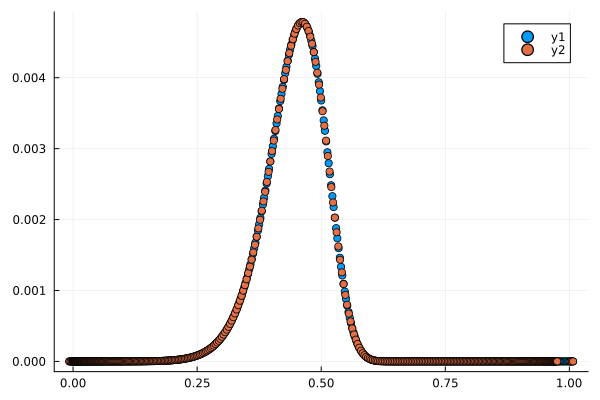

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

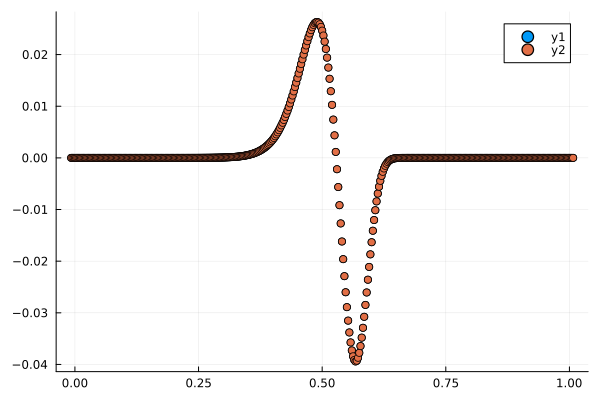

In [417]:
scatter([x1,x1],[y1,y2])